In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_50   = pd.read_csv('tables/out50_nclim.csv')
df_100  = pd.read_csv('tables/out100_nclim.csv')
df_200  = pd.read_csv('tables/out200_nclim.csv')
df_500  = pd.read_csv('tables/out500_nclim.csv')
df_1000 = pd.read_csv('tables/out1000_nclim.csv')
df_3000 = pd.read_csv('tables/out3000_nclim.csv')

In [3]:
dfList = [df_50, df_100, df_200, df_500, df_100, df_3000]

In [4]:
def getData(df, column):
    '''
    Parameters:
        df(DataFrame): DataFrame.
        column(str): DataFrame's column name.

    Returns:
        columnData(list): Extracted data from the DataFrame's column.
    '''
    
    columnData = []
    
    for i in range(10):
        columnData.append(df[df['run'] == (i + 1)][column])
        
    return columnData

In [5]:
def generateBoxPlots(subPlots, attr):
    '''
    Parameters:
        subPlots(numpy.ndarray): Array with empty subplots.
        attr(str): Column name to extract data from DataFrames.
    '''
    
    for i in range(6):
        subPlots[i].boxplot(getData(dfList[i], attr), showfliers = False, vert = False)

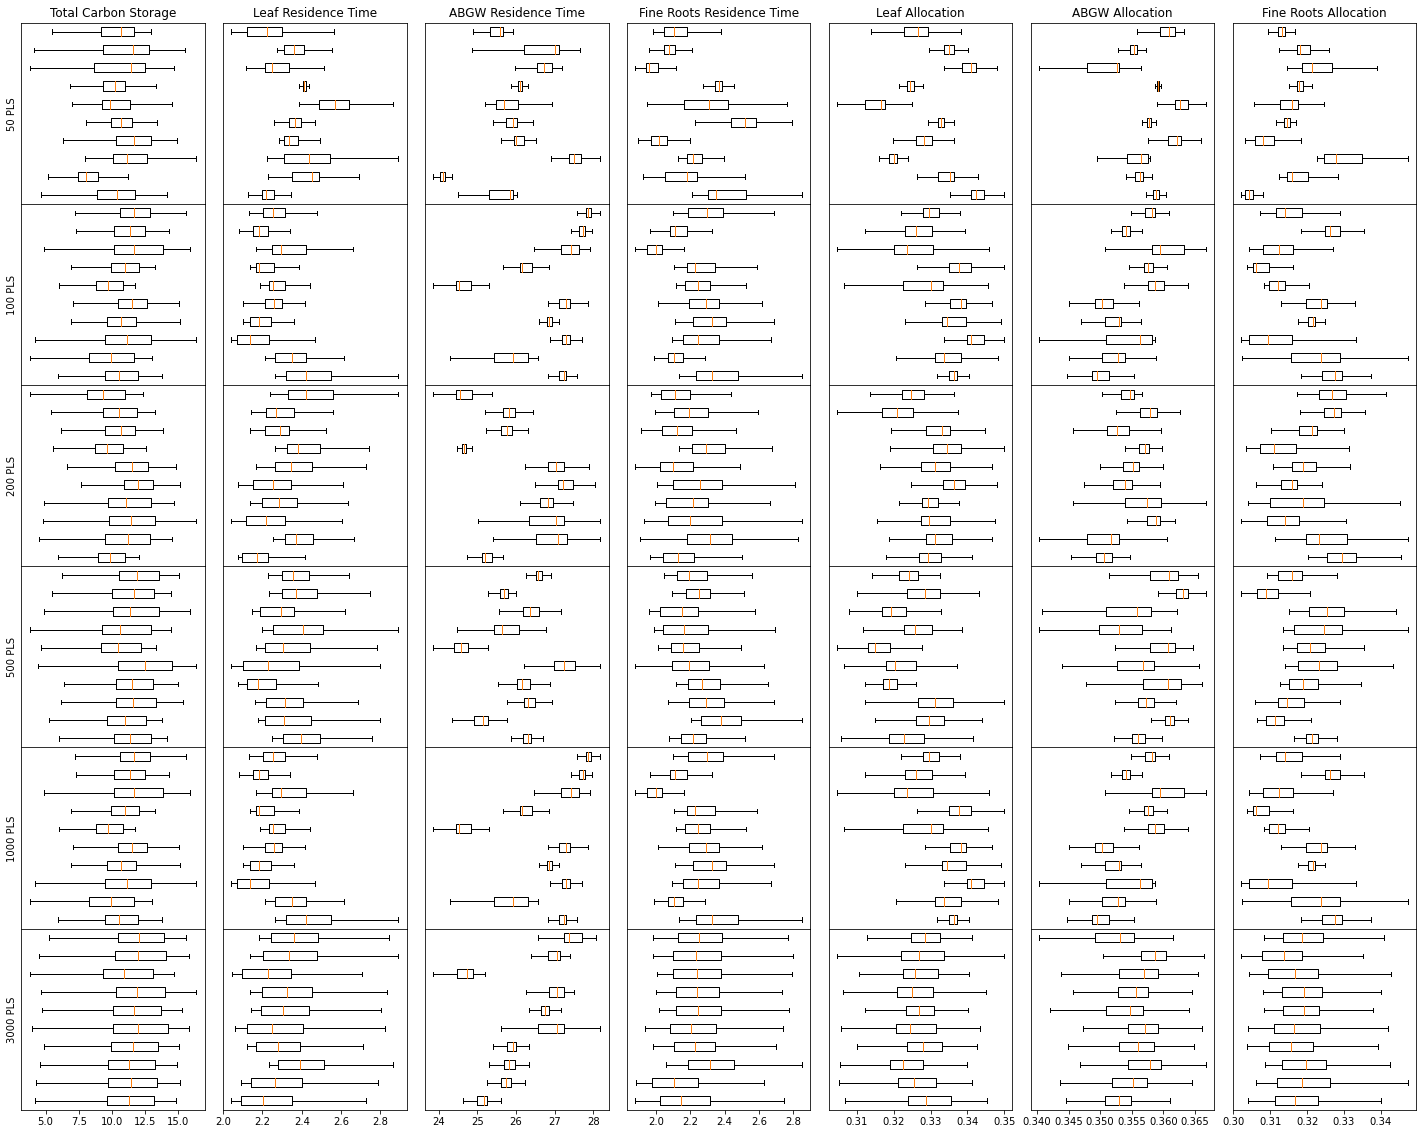

In [8]:
mainPlot, subPlots = plt.subplots(
    6, 7,  
    figsize = (25, 20), 
    gridspec_kw = {'hspace': 0, 'wspace': .1}
)

(cmass_50,   tleaf_cwm_50,   twood_cwm_50,   troot_cwm_50,   aleaf_cwm_50,   awood_cwm_50,   aroot_cwm_50), \
(cmass_100,  tleaf_cwm_100,  twood_cwm_100,  troot_cwm_100,  aleaf_cwm_100,  awood_cwm_100,  aroot_cwm_100), \
(cmass_200,  tleaf_cwm_200,  twood_cwm_200,  troot_cwm_200,  aleaf_cwm_200,  awood_cwm_200,  aroot_cwm_200), \
(cmass_500,  tleaf_cwm_500,  twood_cwm_500,  troot_cwm_500,  aleaf_cwm_500,  awood_cwm_500,  aroot_cwm_500), \
(cmass_1000, tleaf_cwm_1000, twood_cwm_1000, troot_cwm_1000, aleaf_cwm_1000, awood_cwm_1000, aroot_cwm_1000), \
(cmass_3000, tleaf_cwm_3000, twood_cwm_3000, troot_cwm_3000, aleaf_cwm_3000, awood_cwm_3000, aroot_cwm_3000) = subPlots

subPlotsCmass    = subPlots[:, 0]
subPlotsTleafCwm = subPlots[:, 1]
subPlotsTwoodCwm = subPlots[:, 2]
subPlotsTrootCwm = subPlots[:, 3]
subPlotsAleafCwm = subPlots[:, 4]
subPlotsAwoodCwm = subPlots[:, 5]
subPlotsArootCwm = subPlots[:, 6]

generateBoxPlots(subPlotsCmass,    'cmass')
generateBoxPlots(subPlotsTleafCwm, 'tleaf_cwm')
generateBoxPlots(subPlotsTwoodCwm, 'twood_cwm')
generateBoxPlots(subPlotsTrootCwm, 'troot_cwm')
generateBoxPlots(subPlotsAleafCwm, 'aleaf_cwm')
generateBoxPlots(subPlotsAwoodCwm, 'awood_cwm')
generateBoxPlots(subPlotsArootCwm, 'aroot_cwm')

subPlotsCmass[0].set_title('Total Carbon Storage')
subPlotsTleafCwm[0].set_title('Leaf Residence Time')
subPlotsTwoodCwm[0].set_title('ABGW Residence Time')
subPlotsTrootCwm[0].set_title('Fine Roots Residence Time')
subPlotsAleafCwm[0].set_title('Leaf Allocation')
subPlotsAwoodCwm[0].set_title('ABGW Allocation')
subPlotsArootCwm[0].set_title('Fine Roots Allocation')

subPlotsCmass[0].set_ylabel('50 PLS')
subPlotsCmass[1].set_ylabel('100 PLS')
subPlotsCmass[2].set_ylabel('200 PLS')
subPlotsCmass[3].set_ylabel('500 PLS')
subPlotsCmass[4].set_ylabel('1000 PLS')
subPlotsCmass[5].set_ylabel('3000 PLS')

for subPlot in subPlots.flat:
    subPlot.set_yticks([])
    subPlot.label_outer()
    
mainPlot.savefig('plot.jpg', dpi = 80)